In [2]:
%pylab inline
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [3]:
def F3(Y1,Y2,Y3):
    r12=sqrt( (Y1[0]-Y2[0])**2 + (Y1[1]-Y2[1])**2 )
    r13=sqrt( (Y1[0]-Y3[0])**2 + (Y1[1]-Y3[1])**2 )
    r23=sqrt( (Y2[0]-Y3[0])**2 + (Y2[1]-Y3[1])**2 )
    
    F1x=(-1*(Y1[0]-Y2[0])/r12**3) + (-1*(Y1[0]-Y3[0])/r13**3)
    F2x=(-1*(Y2[0]-Y1[0])/r12**3) + (-1*(Y2[0]-Y3[0])/r23**3)
    F3x=(-1*(Y3[0]-Y1[0])/r13**3) + (-1*(Y3[0]-Y2[0])/r23**3)
    
    F1y=(-1*(Y1[1]-Y2[1])/r12**3) + (-1*(Y1[1]-Y3[1])/r13**3)
    F2y=(-1*(Y2[1]-Y1[1])/r12**3) + (-1*(Y2[1]-Y3[1])/r23**3)
    F3y=(-1*(Y3[1]-Y1[1])/r13**3) + (-1*(Y3[1]-Y2[1])/r23**3)
    
    return  np.array([Y1[2],Y1[3],F1x,F1y]), np.array([Y2[2],Y2[3],F2x,F2y]), np.array([Y3[2],Y3[3],F3x,F3y])

def Kutta4_3():
    global t
    global dt
    global Masa1, Masa2, Masa3
    
    K1 = F3(Masa1, Masa2, Masa3)
    K2 = F3(Masa1 + dt*(1./2.*K1[0]), Masa2 + dt*(1./2.*K1[1]), Masa3 + dt*(1./2.*K1[2]))
    K3 = F3(Masa1 + dt*(1./2.*K2[0]), Masa2 + dt*(1./2.*K2[1]), Masa3 + dt*(1./2.*K2[2]))
    K4 = F3(Masa1 + dt*K3[0], Masa2 + dt*K3[1], Masa3 + dt*K3[2])
    
    Masa1+= dt * (1/6.*K1[0] + 1/3. * K2[0] + 1/3.*K3[0] + 1/6.*K4[0])
    Masa2+= dt * (1/6.*K1[1] + 1/3. * K2[1] + 1/3.*K3[1] + 1/6.*K4[1])
    Masa3+= dt * (1/6.*K1[2] + 1/3. * K2[2] + 1/3.*K3[2] + 1/6.*K4[2])
    t+= dt


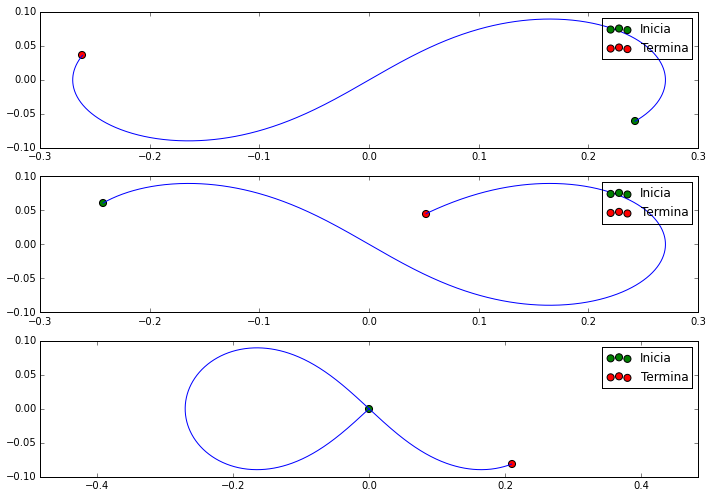

In [4]:
a = 0.24250109 
b = -0.0607718825
c = 0.93240737 
d = 0.86473146

r1=np.array([a, b])
r2=np.array([-a, -b])
r3=np.array([0., 0.])

v1=np.array([c, d])
v2=v1
v3=-2.*v1

CImasa1=np.array([r1[0], r1[1], v1[0], v1[1]])
CImasa2=np.array([r2[0], r2[1], v2[0], v2[1]])
CImasa3=np.array([r3[0], r3[1], v3[0], v3[1]])

numIter=1000

Masa1=CImasa1
Masa2=CImasa2
Masa3=CImasa3

tmax=0.5
t=0.
dt=tmax/numIter

history1=np.array([[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]])
history2=np.array([[t,Masa2[0],Masa2[1],Masa2[2],Masa2[3]]])
history3=np.array([[t,Masa3[0],Masa3[1],Masa3[2],Masa3[3]]])

for __ in range(numIter):    
    Kutta4_3()
    history1=np.append(history1,[[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]],axis=0)
    history2=np.append(history2,[[t,Masa2[0],Masa2[1],Masa2[2],Masa2[3]]],axis=0)
    history3=np.append(history3,[[t,Masa3[0],Masa3[1],Masa3[2],Masa3[3]]],axis=0)

            
mov,ax=plt.subplots(3, 1,figsize=(10, 7))

ax[0].plot(history1[:,1],history1[:,2])
ax[1].plot(history2[:,1],history2[:,2])
ax[2].plot(history3[:,1],history3[:,2])

ax[0].scatter(history1[0,1],history1[0,2], c="g",label='Inicia',s=50)
ax[0].scatter(history1[-1,1],history1[-1,2], c="r",label='Termina',s=50)

ax[1].scatter(history2[0,1],history2[0,2], c="g",label='Inicia',s=50)
ax[1].scatter(history2[-1,1],history2[-1,2], c="r",label='Termina',s=50)

ax[2].scatter(history3[0,1],history3[0,2], c="g",label='Inicia',s=50)
ax[2].scatter(history3[-1,1],history3[-1,2], c="r",label='Termina',s=50)

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.tight_layout()
plt.axis('equal')
plt.show()



Periodo encontrado: [ 0.791]


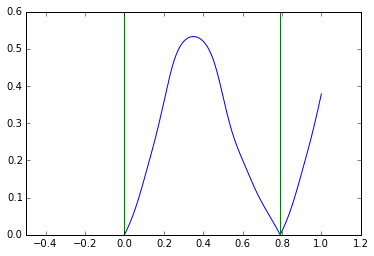

In [5]:
Masa1=CImasa1
Masa2=CImasa2
Masa3=CImasa3
numIter=1000
tmax=1
t=0.
dt=tmax/numIter

hist=np.array([[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]])

for __ in range(numIter):    
    Kutta4_3()
    hist=np.append(hist,[[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]],axis=0)
    

tiempo=hist[:, 0]
dis=np.sqrt( (hist[:, 1]-hist[0, 1])**2 + (hist[:, 2]-hist[0, 2])**2 )
mini=np.amin(dis[1:])

T=tiempo[dis==mini]

print ("Periodo encontrado:",T)
plt.figure()
plt.plot(tiempo,dis)
plt.axvline(0,c='g')
plt.axvline(T,c='g')
plt.xlim(-0.5,1.2)
plt.show()

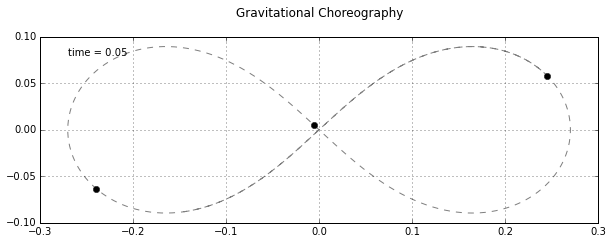

In [14]:

numIter=1000

Masa1=CImasa1
Masa2=CImasa2
Masa3=CImasa3

tmax=1
t=0.
dt=tmax/numIter

history1=np.array([[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]])
history2=np.array([[t,Masa2[0],Masa2[1],Masa2[2],Masa2[3]]])
history3=np.array([[t,Masa3[0],Masa3[1],Masa3[2],Masa3[3]]])

for __ in range(numIter):    
    Kutta4_3()
    history1=np.append(history1,[[t,Masa1[0],Masa1[1],Masa1[2],Masa1[3]]],axis=0)
    history2=np.append(history2,[[t,Masa2[0],Masa2[1],Masa2[2],Masa2[3]]],axis=0)
    history3=np.append(history3,[[t,Masa3[0],Masa3[1],Masa3[2],Masa3[3]]],axis=0)


#Crea la figura con un eje, una grilla e igual proporción
x1=history1[:,1]
x2=history2[:,1]
x3=history3[:,1]
y1=history1[:,2]
y2=history2[:,2]
y3=history3[:,2]
t=history1[:,0]

fig=figure()

ax = fig.add_subplot(111, autoscale_on=True)
ax.grid(True) 
ax.set_aspect('equal')

#Grafica la trayectoria completa
completetrayectory = ax.plot(x1,y1,"--k",alpha=0.5)
title("Gravitational Choreography\n")

#Crea las trayectorias de los tres planetas
trayectory1, = ax.plot([], [], '-', lw=2)
trayectory2, = ax.plot([], [], '-', lw=2)
trayectory3, = ax.plot([], [], '-', lw=2)
#Crea los tres planetas
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)

time_template = 'time = %.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 0.05

#Crea la función que anima que establece los datos para las trayectorias y planetas
def animate(i):
    if( i<10 ):
        mini=0
    else:
        mini=i-10
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    time_text.set_text(time_template%(i*dt))
    return trayectory1, trayectory2, trayectory3, planet1, planet2, planet3, time_text


animacion = animation.FuncAnimation(fig,animate,np.arange(1,len(t)),interval=10, blit=False)
#animacion.save('grav_choreography_3Bodies.mp4', writer = 'mencoder', fps=15)
show()

In [7]:
def F4(Y1,Y2,Y3,Y4):
    r12=sqrt( (Y1[0]-Y2[0])**2 + (Y1[1]-Y2[1])**2 )
    r13=sqrt( (Y1[0]-Y3[0])**2 + (Y1[1]-Y3[1])**2 )
    r14=sqrt( (Y1[0]-Y4[0])**2 + (Y1[1]-Y4[1])**2 )
    r23=sqrt( (Y2[0]-Y3[0])**2 + (Y2[1]-Y3[1])**2 )
    r24=sqrt( (Y2[0]-Y4[0])**2 + (Y2[1]-Y4[1])**2 )
    r34=sqrt( (Y3[0]-Y4[0])**2 + (Y3[1]-Y4[1])**2 )
    
    F1x=(-1*(Y1[0]-Y2[0])/r12**3) + (-1*(Y1[0]-Y3[0])/r13**3) + (-1*(Y1[0]-Y4[0])/r14**3)
    F2x=(-1*(Y2[0]-Y1[0])/r12**3) + (-1*(Y2[0]-Y3[0])/r23**3) + (-1*(Y2[0]-Y4[0])/r24**3)
    F3x=(-1*(Y3[0]-Y1[0])/r13**3) + (-1*(Y3[0]-Y2[0])/r23**3) + (-1*(Y3[0]-Y4[0])/r34**3)
    F4x=(-1*(Y4[0]-Y1[0])/r14**3) + (-1*(Y4[0]-Y2[0])/r24**3) + (-1*(Y4[0]-Y3[0])/r34**3)
    
    F1y=(-1*(Y1[1]-Y2[1])/r12**3) + (-1*(Y1[1]-Y3[1])/r13**3) + (-1*(Y1[1]-Y4[1])/r14**3)
    F2y=(-1*(Y2[1]-Y1[1])/r12**3) + (-1*(Y2[1]-Y3[1])/r23**3) + (-1*(Y2[1]-Y4[1])/r24**3)
    F3y=(-1*(Y3[1]-Y1[1])/r13**3) + (-1*(Y3[1]-Y2[1])/r23**3) + (-1*(Y3[1]-Y4[1])/r34**3)
    F4y=(-1*(Y4[1]-Y1[1])/r14**3) + (-1*(Y4[1]-Y2[1])/r24**3) + (-1*(Y4[1]-Y3[1])/r34**3)
    
    return np.array([Y1[2],Y1[3],F1x,F1y]),np.array([Y2[2],Y2[3],F2x,F2y]),np.array([Y3[2],Y3[3],F3x,F3y]),np.array([Y4[2],Y4[3],F4x,F4y])

def Kutta4_4():
    global t
    global dt
    global M1, M2, M3, M4
    
    K1 = F4(M1, M2, M3, M4)
    K2 = F4(M1 + dt*(1./2.*K1[0]), M2 + dt*(1./2.*K1[1]), M3 + dt*(1./2.*K1[2]), M4 + dt*(1./2.*K1[3]))
    K3 = F4(M1 + dt*(1./2.*K2[0]), M2 + dt*(1./2.*K2[1]), M3 + dt*(1./2.*K2[2]), M4 + dt*(1./2.*K2[3]))
    K4 = F4(M1 + dt*K3[0], M2 + dt*K3[1], M3 + dt*K3[2], M4 + dt*K3[3])
    
    M1+= dt * (1/6.*K1[0] + 1/3. * K2[0] + 1/3.*K3[0] + 1/6.*K4[0])
    M2+= dt * (1/6.*K1[1] + 1/3. * K2[1] + 1/3.*K3[1] + 1/6.*K4[1])
    M3+= dt * (1/6.*K1[2] + 1/3. * K2[2] + 1/3.*K3[2] + 1/6.*K4[2])
    M4+= dt * (1/6.*K1[3] + 1/3. * K2[3] + 1/3.*K3[3] + 1/6.*K4[3])
    t+= dt



In [8]:
ran=np.linspace(0.70, 0.78, 100)
for i in range(len(ran)):
    
    aPrueba=ran[i]
    CIm1=np.array([0.384277200514, 0., 0., aPrueba])
    CIm2=np.array([-0.0156823005697, -0.13966430504, -2.01155925929, -1.19817066623])
    CIm3=np.array([-0.352912599375, 0.,0., 1.63619158614])
    CIm4=np.array([-0.0156823005697, 0.13966430504, 2.01155925929, -1.19817066623])
    
    M1=CIm1
    M2=CIm2
    M3=CIm3
    M4=CIm4
    
    tmax=1.
    t=0.
    numIter=100
    dt=tmax/numIter
    
    histo=np.array([[t,M1[0],M1[1],M1[2],M1[3]]])
    for __ in range(numIter):    
        Kutta4_4()
        histo=np.append(histo,[[t,M1[0],M1[1],M1[2],M1[3]]],axis=0)
    
    tiem=histo[:, 0]
    dis=np.sqrt( (histo[:,1]-histo[0,1])**2 + (histo[:,2]-histo[0,2])**2 )
    mini=np.amin(dis[1:])
    T=tiem[dis==mini]
    
    if (np.round(T[0],4) == 1.):
        found=aPrueba
        print ("a encontrado:",found)


a encontrado: 0.760606060606


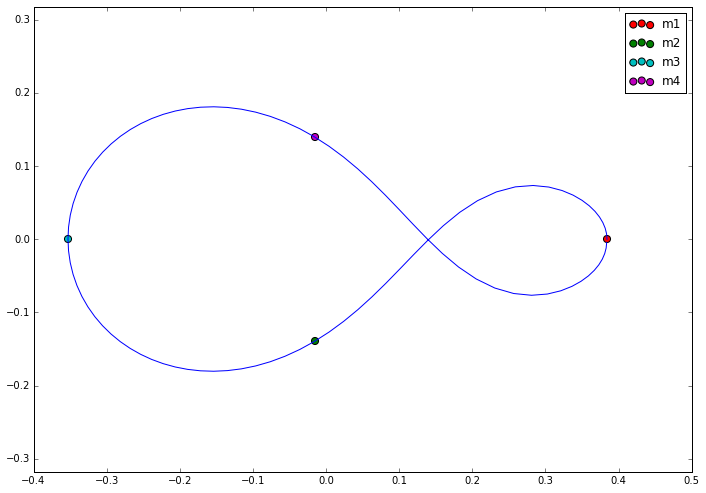

In [9]:
CIm1=np.array([0.384277200514, 0., 0., 0.76060606])
CIm2=np.array([-0.0156823005697, -0.13966430504, -2.01155925929, -1.19817066623])
CIm3=np.array([-0.352912599375, 0.,0., 1.63619158614])
CIm4=np.array([-0.0156823005697, 0.13966430504, 2.01155925929, -1.19817066623])
    
M1=CIm1
M2=CIm2
M3=CIm3
M4=CIm4
    
tmax=1.
t=0.
numIter=100
dt=tmax/numIter
    
histo1=np.array([[t,M1[0],M1[1],M1[2],M1[3]]])
histo2=np.array([[t,M2[0],M2[1],M2[2],M2[3]]])
histo3=np.array([[t,M3[0],M3[1],M3[2],M3[3]]])
histo4=np.array([[t,M4[0],M4[1],M4[2],M4[3]]])
for __ in range(numIter):    
    Kutta4_4()
    histo1=np.append(histo1,[[t,M1[0],M1[1],M1[2],M1[3]]],axis=0) 
    histo2=np.append(histo2,[[t,M2[0],M2[1],M2[2],M2[3]]],axis=0) 
    histo3=np.append(histo3,[[t,M3[0],M3[1],M3[2],M3[3]]],axis=0) 
    histo4=np.append(histo4,[[t,M4[0],M4[1],M4[2],M4[3]]],axis=0) 

figure(figsize=(10, 7))
plot(histo1[:,1],histo1[:,2])
scatter(histo1[0,1],histo1[0,2],label='m1',c='r',s=50)
scatter(histo2[0,1],histo2[0,2],label='m2',c='g',s=50)
scatter(histo3[0,1],histo3[0,2],label='m3',c='c',s=50)
scatter(histo4[0,1],histo4[0,2],label='m4',c='m',s=50)
legend()
plt.tight_layout()
plt.axis('equal')
plt.show()

In [10]:
t=histo1[:,0]

x1=histo1[:, 1]
vx1=histo1[:,3]
y1=histo1[:, 2]
vy1=histo1[:,4]

x2=histo2[:, 1]
vx2=histo2[:,3]
y2=histo2[:, 2]
vy2=histo2[:,4]

x3=histo3[:, 1]
vx3=histo3[:,3]
y3=histo3[:, 2]
vy3=histo3[:,4]

x4=histo4[:, 1]
vx4=histo4[:,3]
y4=histo4[:, 2]
vy4=histo4[:,4]

def K(vx,vy):
    return (np.sqrt(vx**2 + vy**2))**2/2.

def U(x1, x2, y1, y2):
    return (-1./np.sqrt((x2-x1)**2 + (y2 - y1)**2))
    

KTotal=K(vx1,vy1)+K(vx2,vy2)+K(vx3,vy3)+K(vx4,vy4)
UTotal=U(x1,x2,y1,y2)+U(x1,x3,y1,y3)+U(x1,x4,y1,y4)+U(x2,x3,y2,y3)+U(x2,x4,y2,y4)+U(x3,x4,y3,y4)
ETotal=KTotal+UTotal

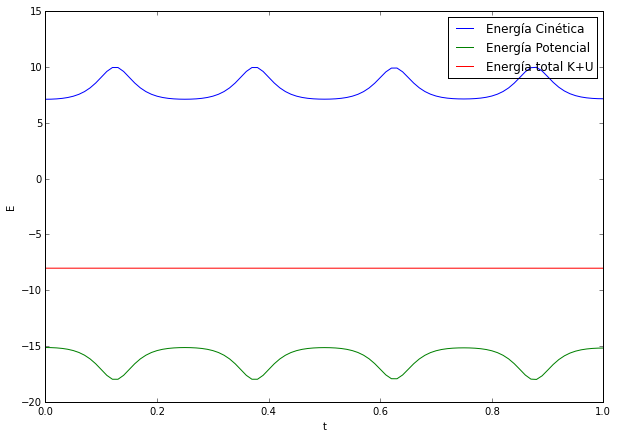

In [11]:
figure(figsize(10,7))

plot(tiem, KTotal, label="Energía Cinética")
plot(tiem, UTotal, label="Energía Potencial")
plot(tiem, ETotal, label="Energía total K+U")
xlim(0, 1)
xlabel("t")
ylim(-20, 15)
ylabel("E")
legend()
show()

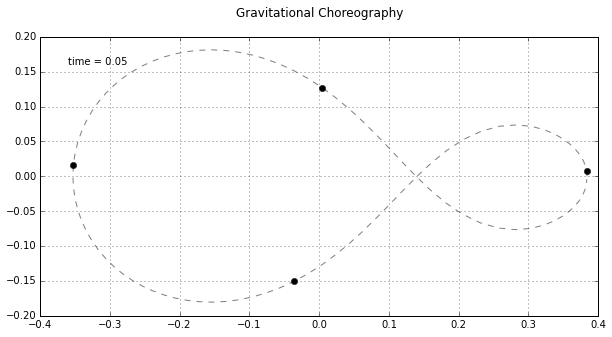

In [13]:

fig=figure()

ax = fig.add_subplot(111, autoscale_on=True)
ax.grid(True) 
ax.set_aspect('equal')

#Grafica la trayectoria completa
completetrayectory = ax.plot(x1,y1,"--k",alpha=0.5)
title("Gravitational Choreography\n")

#Crea las trayectorias de los tres planetas
trayectory1, = ax.plot([], [], '-', lw=2)
trayectory2, = ax.plot([], [], '-', lw=2)
trayectory3, = ax.plot([], [], '-', lw=2)
trayectory4, = ax.plot([], [], '-', lw=2)
#Crea los tres planetas
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)
planet4, = ax.plot([], [], 'ok', lw=2)

time_template = 'time = %.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 0.05

#Crea la función que anima que establece los datos para las trayectorias y planetas
def animate(i):
    if( i<10 ):
        mini=0
    else:
        mini=i-10
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]
    thisx4 = x4[mini:i]
    thisy4 = y4[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    trayectory4.set_data(thisx4, thisy4)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    planet4.set_data([x4[i]],[y4[i]])
    
    time_text.set_text(time_template%(i*dt))
    return trayectory1, trayectory2, trayectory3,trayectory4, planet1, planet2, planet3, planet4, time_text


animacion = animation.FuncAnimation(fig,animate,np.arange(1,len(t)),interval=10, blit=False)
#animacion.save('grav_choreography_4Bodies.mp4', writer = 'mencoder', fps=15)

show()

#Animaciones 
Para ver las animación dar ver en la carpeta contenedora
* grav_choreography_3Bodies.mp4
* grav_choreography_4Bodies.mp4